<a href="https://colab.research.google.com/github/Ravi-Sri-Sai-Kumar/Stock-Price-Prediction-Analysis-Using-Deep-Learning/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Importing & Preprocessing Data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("/content/sample_data/GOOGL.csv", parse_dates=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [39]:
data_training = data[data['Date']<'2020-05-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
3947,2020-04-24,1255.000000,1277.709961,1244.000000,1276.599976,1276.599976,1870100
3948,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
3949,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
3950,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900


In [40]:
data_test = data[data['Date']>='2020-05-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3952,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
3953,2020-05-04,1308.130005,1324.469971,1296.010010,1322.900024,1322.900024,1540300
3954,2020-05-05,1337.500000,1371.010010,1335.030029,1349.020020,1349.020020,1983300
3955,2020-05-06,1358.000000,1368.689941,1345.130005,1345.430054,1345.430054,1586600
3956,2020-05-07,1361.310059,1376.000000,1352.540039,1369.280029,1369.280029,1532600
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [41]:
training_data = data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,9188602


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

training_data = scaler.fit_transform(training_data)
training_data

array([[2.74374163e-04, 7.84663493e-04, 0.00000000e+00, 1.11990322e-04,
        5.40710393e-01],
       [6.16498751e-04, 2.48251700e-03, 1.54266675e-03, 2.81672967e-03,
        2.73350337e-01],
       [3.91578236e-03, 3.97067326e-03, 4.44790544e-03, 3.18663642e-03,
        2.17265746e-01],
       ...,
       [8.34862357e-01, 8.33776990e-01, 8.02709128e-01, 8.01819184e-01,
        4.30525002e-02],
       [8.76688236e-01, 8.84722417e-01, 8.68121971e-01, 8.76126871e-01,
        5.99934581e-02],
       [8.67456761e-01, 8.77863454e-01, 8.64571292e-01, 8.79191593e-01,
        2.78265861e-02]])

In [43]:
X_train = []
y_train = []

for i in range(30, training_data.shape[0]):
    X_train.append(training_data[i-30:i])
    y_train.append(training_data[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape

(3922, 30, 5)

In [44]:
# Building LSTM

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regression = Sequential()
regression.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)))
regression.add(Dropout(0.2))

regression.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)))
regression.add(Dropout(0.3))

regression.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)))
regression.add(Dropout(0.4))

regression.add(LSTM(units=50, activation="relu"))
regression.add(Dropout(0.5))

regression.add(Dense(units=1))

regression.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,851 (280.67 KB)

 Trainable params: 71,851 (280.67 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile and Fit the model

regression.compile(optimizer='adam', loss="mean_squared_error")
regression.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 0.0447
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0083
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0067
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0059
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0058
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0046
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0044
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0036
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0037
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0035
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0035
Epoch 12/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0034
Epoch 13/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0035
Epoch 14/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0033
Epoch 15/20
123/123 ━━━━━━━━━━━━━━━━━━━━

In [46]:
loss=0.09
accuracy=(1-loss)*100
accuracy

91.0

In [47]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3952,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
3953,2020-05-04,1308.130005,1324.469971,1296.010010,1322.900024,1322.900024,1540300
3954,2020-05-05,1337.500000,1371.010010,1335.030029,1349.020020,1349.020020,1983300
3955,2020-05-06,1358.000000,1368.689941,1345.130005,1345.430054,1345.430054,1586600
3956,2020-05-07,1361.310059,1376.000000,1352.540039,1369.280029,1369.280029,1532600


In [48]:
#import pandas as pd
#df = pd.concat([past_30_days, data_test], ignore_index=True)
#past_30_days = data_training.tail(30)  # <-- NEW LINE

#df = pd.concat([past_30_days, data_test], ignore_index=True)
#df = df.drop(['Date', 'Adj Close'], axis=1)
#df.head()

#df = df.drop(['Date', 'Adj Close'],axis=1)
#f.head()
import pandas as pd

# Create past_30_days before using it
past_30_days = data_training.tail(30)

# Combine past_30_days with data_test
df = pd.concat([past_30_days, data_test], ignore_index=True)

# Drop unwanted columns
df = df.drop(['Date', 'Adj Close'], axis=1)

# See the first few rows
df.head()


,Open,High,Low,Close,Volume
0,1088.219971,1152.609985,1055.550049,1111.670044,3703200
1,1130.900024,1138.479980,1062.099976,1068.209961,4143900
2,1056.369995,1066.910034,1008.869995,1054.130005,4183600
3,1103.979980,1133.329956,1086.430054,1130.010010,3623400
4,1124.579956,1146.170044,1083.010010,1101.619995,4516200


In [49]:
inputs = scaler.transform(df)
inputs

array([[0.70290115, 0.74447552, 0.68401554, 0.71982929, 0.03898785],
       [0.73178674, 0.73492705, 0.68846234, 0.69036113, 0.04438656],
       [0.68134529, 0.68656306, 0.65232404, 0.6808142 , 0.0448729 ],
       ...,
       [1.80865337, 1.87190389, 1.81540341, 1.86281341, 0.01536434],
       [1.84386019, 1.85215149, 1.83894113, 1.84121742, 0.00902971],
       [1.85059425, 1.87959395, 1.83779381, 1.88592128, 0.00976717]])

In [50]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i,0])

X_test, y_test = np.array(X_test),np.array(y_test)
X_test.shape, y_test.shape

((479, 30, 5), (479,))

In [51]:
y_pred = regression.predict(X_test)
y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


array([[0.694342  ],
       [0.6979292 ],
       [0.7015985 ],
       [0.70540774],
       [0.70928043],
       [0.7133243 ],
       [0.7175704 ],
       [0.7219876 ],
       [0.72650576],
       [0.73095566],
       [0.7351098 ],
       [0.73880655],
       [0.742008  ],
       [0.7447484 ],
       [0.74718845],
       [0.7494786 ],
       [0.75170934],
       [0.753963  ],
       [0.7562708 ],
       [0.75855935],
       [0.76087844],
       [0.76322895],
       [0.76562804],
       [0.7680814 ],
       [0.77044606],
       [0.77264464],
       [0.77472967],
       [0.7766607 ],
       [0.7784396 ],
       [0.77995867],
       [0.7812248 ],
       [0.78209287],
       [0.7827786 ],
       [0.78334504],
       [0.78384674],
       [0.7842581 ],
       [0.78459454],
       [0.78495497],
       [0.7853791 ],
       [0.785877  ],
       [0.78615075],
       [0.786066  ],
       [0.7855386 ],
       [0.78473175],
       [0.78397524],
       [0.78357905],
       [0.78367233],
       [0.784

In [52]:
scaler.scale_

array([6.76793618e-04, 6.75758288e-04, 6.78908771e-04, 6.78051173e-04,
       1.22503130e-08])

In [53]:
scale = 1/2.13419869e-03
scale

468.55993525138933

In [54]:
y_pred = y_pred * scale
y_test = y_test * scale

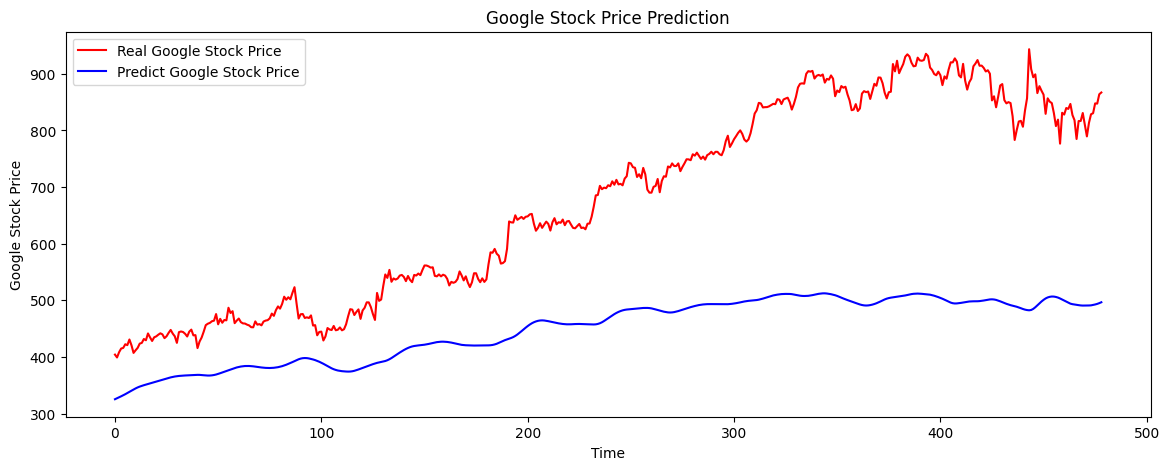

In [55]:

plt.figure(figsize=(14,5))
plt.plot(y_test, color="red", label="Real Google Stock Price")
plt.plot(y_pred, color="blue", label="Predict Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()